In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [20]:
M_p = 2.8435*(10**27)
xi_0 = 0.21674
b_1 =-1.199376
b_2 =0.022616
b_3 = 0.83335
phi_0 = 1.57353
lambda_0 = 6.9*(10**(-10))


In [21]:
def xi(phi):
    return xi_0 * (1 + (b_3 * np.log((phi**2) / (phi_0**2))))

In [28]:
PHI = lambda chi, phi: (M_p**2 + xi(phi) * phi**2) / np.sqrt((M_p**2 * (M_p**2 + xi(phi) * phi**2)) + (6 * xi(phi)**2 * M_p**2 * phi**2))

In [29]:
lower_bound = 1e-30
upper_bound = 10 * M_p

chi_eval = np.arange(lower_bound, upper_bound, 1e21)
sol_phi = solve_ivp(PHI, [lower_bound, upper_bound], [0.1], "RK45", t_eval = chi_eval)

In [30]:
def OMEGA_2(phi):
    return 1 + (xi(phi)*(phi**2) / (M_p**2))

In [34]:
def U(phi) :
    return ((lambda_0/(4*3*2))*(1-2*(1+b_1)*np.log((phi**2)/(phi_0**2))+2*(1+b_2)*(np.log((phi**2)/(phi_0**2)))**2) / OMEGA_2(phi)**2) * phi**4

In [35]:
final = U(sol_phi.y[0].astype(float)) * (1e10 * M_p**(-4))

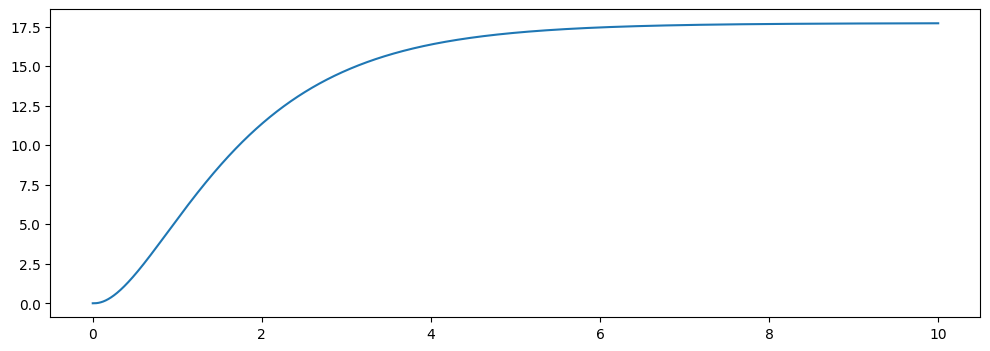

[2.67979915e-113 8.27221944e-023 1.36209554e-021 ... 1.77138821e+001
 1.77138821e+001 1.77138821e+001]


In [36]:
plt.figure(figsize = (12, 4))
plt.plot(chi_eval / M_p, final)
plt.show()
print(final)